<a href="https://colab.research.google.com/github/shraddha240303/Projects/blob/main/credit_risk_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/UCI_Credit_Card.csv')

In [ ]:
df.shape

(30000, 25)

In [ ]:
df.sample(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
19643,19644,460000.0,2,1,2,29,0,0,0,0,...,160894.0,165246.0,169983.0,90150.0,7018.0,7000.0,7002.0,8007.0,8038.0,0
8143,8144,150000.0,2,2,1,47,-1,-1,-1,-1,...,0.0,782.0,316.0,316.0,316.0,0.0,1098.0,0.0,0.0,0
20092,20093,80000.0,2,2,1,39,0,0,0,0,...,30712.0,29629.0,28241.0,2194.0,1560.0,1421.0,1001.0,1000.0,1008.0,0
6645,6646,30000.0,2,2,1,46,1,2,2,2,...,30548.0,31326.0,30688.0,1800.0,1980.0,1200.0,1400.0,0.0,800.0,1
25927,25928,430000.0,2,1,2,42,-2,-2,-2,-2,...,38845.0,0.0,1111.0,75276.0,6008.0,48845.0,0.0,1111.0,1140.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [ ]:
df.isnull().mean()*100

,0
ID,0.0
LIMIT_BAL,0.0
SEX,0.0
EDUCATION,0.0
MARRIAGE,0.0
AGE,0.0
PAY_0,0.0
PAY_2,0.0
PAY_3,0.0
PAY_4,0.0


In [ ]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
# As ID has no impact on dataset. let's drop that.
df.drop(columns=['ID'], inplace=True)

In [ ]:
df['EDUCATION'].value_counts()

,count
EDUCATION,
2,14030
1,10585
3,4917
5,280
4,123
6,51
0,14


In [ ]:
# As Education level of 0 and 6 count is very low, we can remove that
df = df[~df['EDUCATION'].isin([0,6])]
df['EDUCATION'].value_counts()

,count
EDUCATION,
2,14030
1,10585
3,4917
5,280
4,123


In [ ]:
df.groupby('SEX')['default.payment.next.month'].value_counts()

SEX  default.payment.next.month
1    0                              8986
     1                              2869
2    0                             14321
     1                              3759
Name: count, dtype: int64

Here, female are more likely took credit from the bank.

<Axes: xlabel='AGE', ylabel='Count'>

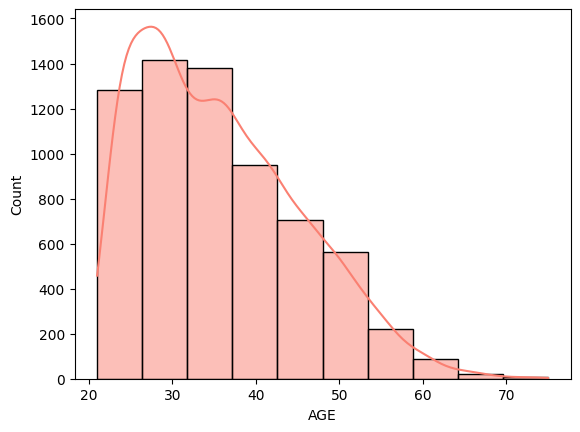

In [ ]:
defaulters = df[df['default.payment.next.month']==1]
sns.histplot(defaulters['AGE'], bins=10, color='salmon', kde=True)

The defaulters age is mostly lie in the range of 21 - 35.

<Axes: xlabel='EDUCATION', ylabel='count'>

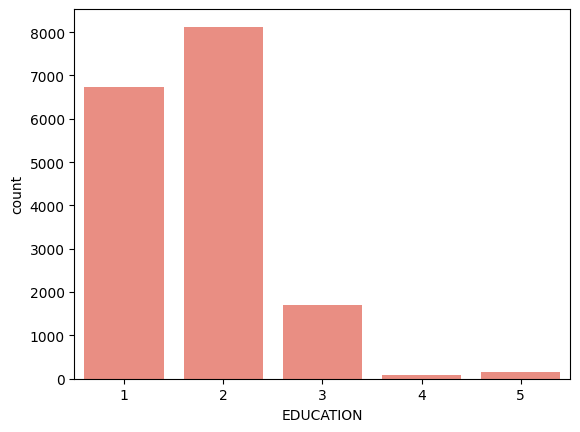

In [ ]:
age_cate = df[(df['AGE'] >= 21) & (df['AGE'] <= 35)]
sns.countplot(x='EDUCATION', data=age_cate, color='salmon')

Mostly defaulter had qualification of Graduate and University.

<Axes: xlabel='MARRIAGE', ylabel='count'>

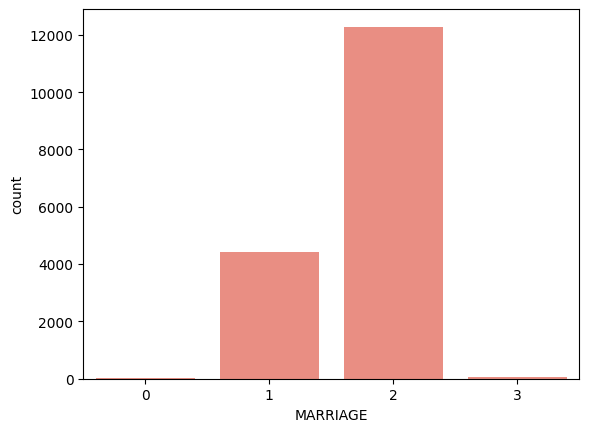

In [ ]:
age_cate = df[(df['AGE'] >= 21) & (df['AGE'] <= 35)]
sns.countplot(x='MARRIAGE', data=age_cate, color='salmon')

Most of defaulters are single.

In [ ]:
from sklearn.preprocessing import RobustScaler

new_df = df.copy()
feature_cols = df.columns[:-1]
rs = RobustScaler()
new_df[feature_cols] = rs.fit_transform(df[feature_cols])
new_df['default.payment.next.month'] = df['default.payment.next.month']
new_df.sample(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
27660,-0.473684,0.0,0.0,0.0,-0.846154,-1.0,0.0,0.0,2.0,0.0,...,-0.145674,-0.169417,-0.150770,-0.149276,0.154031,-0.316071,-0.268962,-0.264725,-0.257765,0
2010,-0.526316,0.0,0.0,0.0,-0.615385,0.0,0.0,0.0,0.0,2.0,...,0.304644,0.378304,0.383837,-0.024963,-0.002159,0.048626,0.268962,-0.397088,0.000000,0
26343,-0.052632,0.0,-1.0,0.0,-0.384615,-2.0,-2.0,-2.0,-2.0,-2.0,...,-0.365037,-0.374072,0.936959,-0.524214,-0.482006,-0.437637,-0.403443,16.027267,3.874984,0
8822,0.210526,-1.0,-1.0,0.0,0.153846,0.0,0.0,0.0,0.0,0.0,...,1.202406,1.401724,1.055890,0.474289,0.237764,0.534889,2.017214,-0.397088,0.386648,0
12960,-0.631579,-1.0,-1.0,0.0,0.461538,0.0,0.0,0.0,0.0,0.0,...,0.018834,-0.083893,-0.356669,-0.149775,4.316459,-0.216630,-0.134481,-0.397088,-0.386648,0


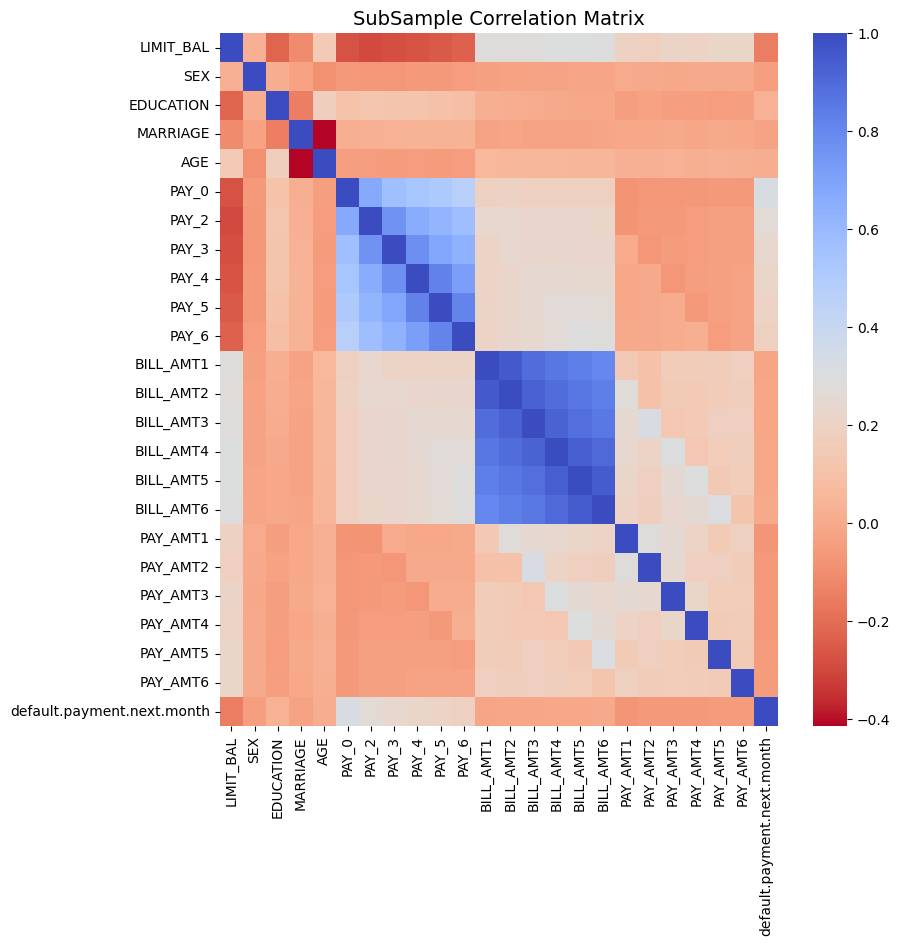

In [ ]:
f, ax1 = plt.subplots(1, 1, figsize=(9, 9))

sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title('SubSample Correlation Matrix', fontsize=14)
plt.show()

In [ ]:
new_df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

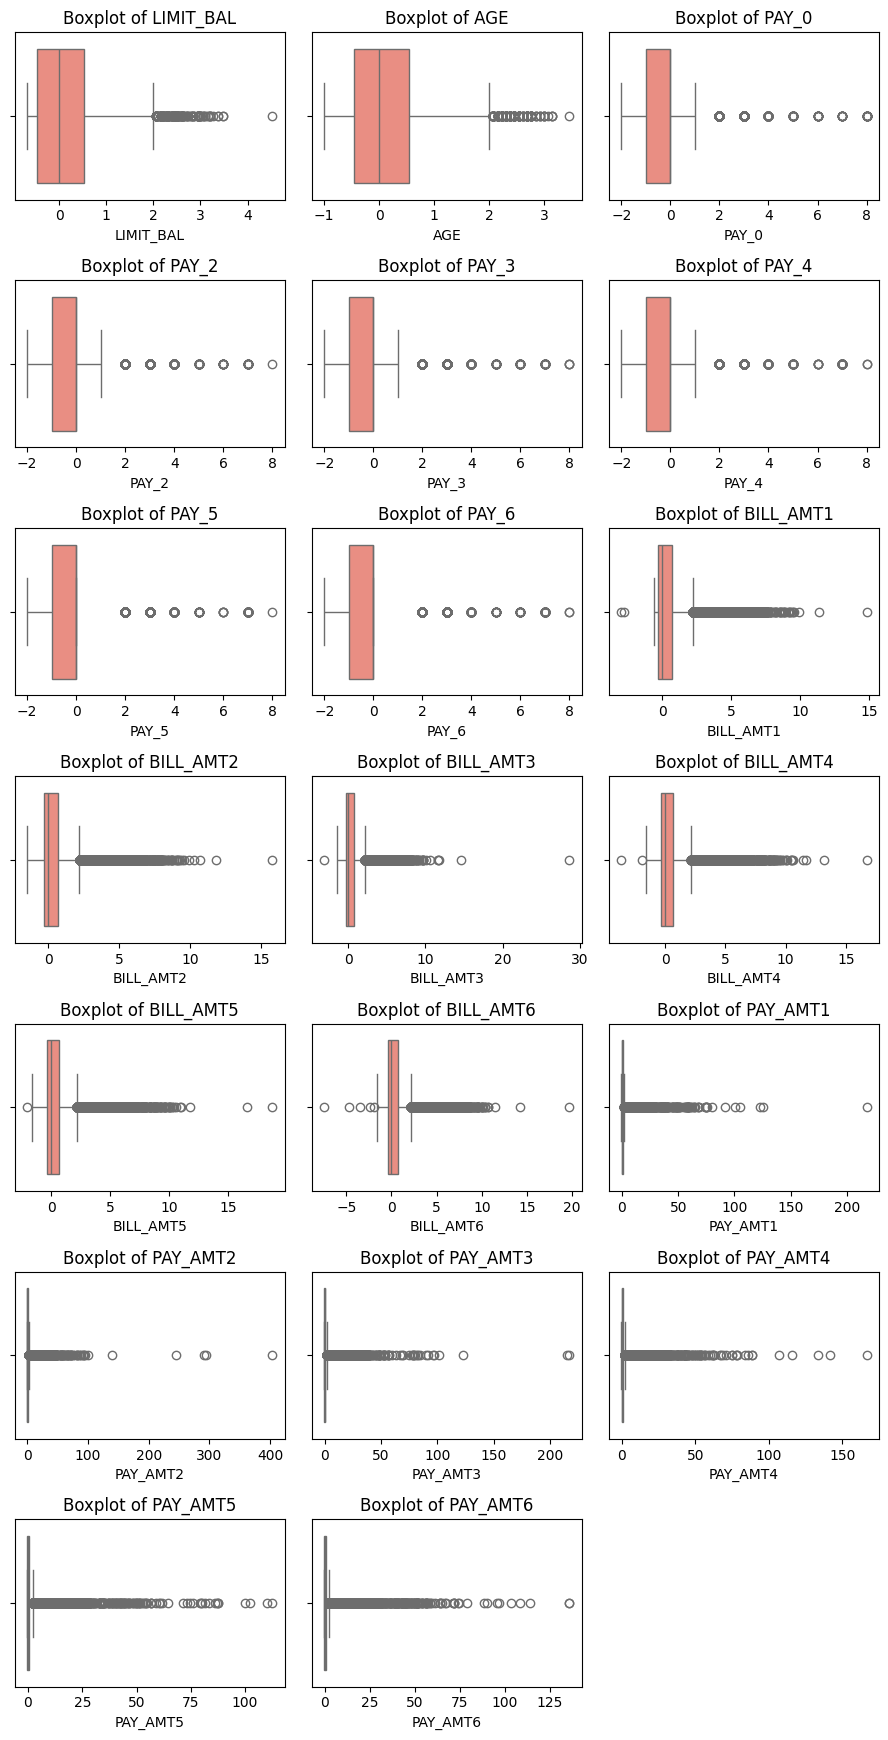

In [ ]:
def box_plot(new_df, cols):
    n_cols = 3
    n_rows = int(np.ceil(len(cols) / n_cols))
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 3, n_rows * 2.5))
    axes = axes.flatten()
    for i, col in enumerate(cols):
        sns.boxplot(x=new_df[col], color='salmon', ax=axes[i])
        axes[i].set_title(f'Boxplot of {col}')
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    plt.tight_layout()
    plt.show()

cols = ['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
        'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
        'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

box_plot(new_df, cols)

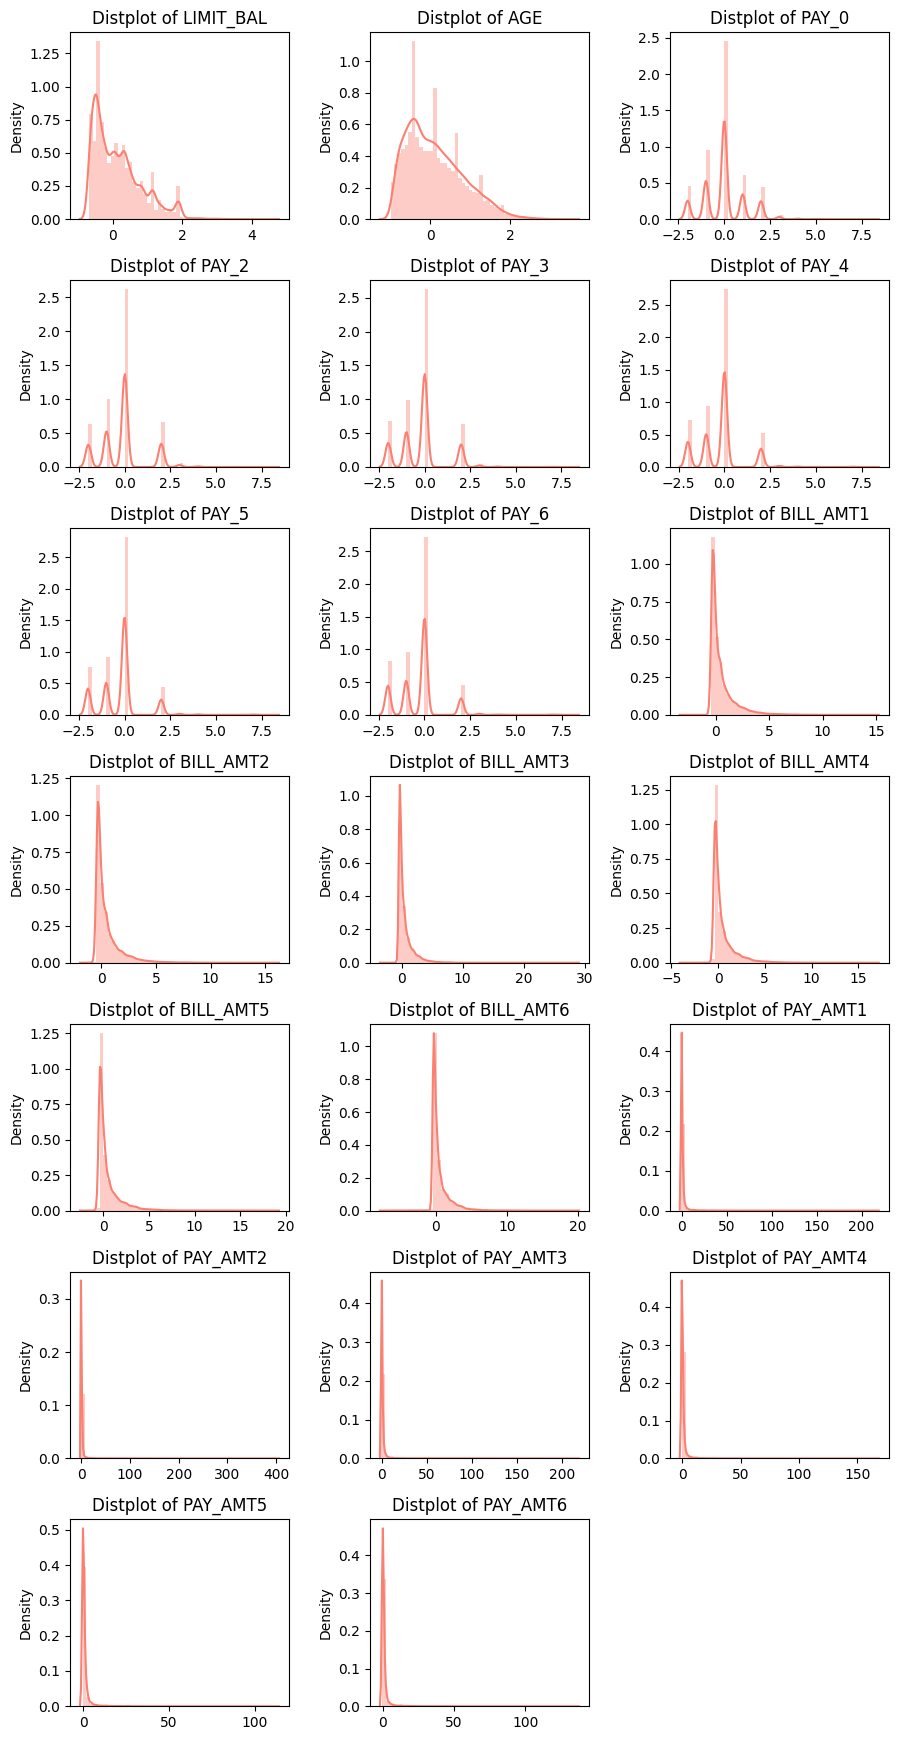

In [ ]:
def dist_plot(new_df, cols):
    n_cols = 3
    n_rows = int(np.ceil(len(cols) / n_cols))
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 3, n_rows * 2.5))
    axes = axes.flatten()
    for i, col in enumerate(cols):
        sns.distplot(x=new_df[col], color='salmon', ax=axes[i])
        axes[i].set_title(f'Distplot of {col}')
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    plt.tight_layout()
    plt.show()

cols = ['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
        'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
        'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

dist_plot(new_df, cols)

In [ ]:
def IQR_rule(df, col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_limit = Q1 - 1.5*IQR
  upper_limit = Q3 + 1.5*IQR
  return (lower_limit, upper_limit)

def capping(df, col):
  lower_limit, upper_limit = IQR_rule(df, col)
  df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])
  df[col] = np.where(df[col] < lower_limit, lower_limit, df[col])
  return df

for i in cols:
  capping(new_df, i)

In [ ]:
from sklearn.decomposition import PCA
bill_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
pca = PCA(n_components=2, random_state=42)
bill_pca = pca.fit_transform(new_df[bill_cols])
bill_pca_df = pd.DataFrame(bill_pca, columns=['BILL_PCA1', 'BILL_PCA2'])
df_pca = new_df.iloc[:, :-1]
df_pca = df_pca.drop(bill_cols, axis=1)
df_pca = df_pca.reset_index(drop=True)
df_pca[['BILL_PCA1', 'BILL_PCA2']] = bill_pca_df
df_pca['default.payment.next.month'] = new_df['default.payment.next.month'].reset_index(drop=True)

In [ ]:
df_pca['default.payment.next.month'].value_counts(normalize=True) * 100

,proportion
default.payment.next.month,
0,77.858694
1,22.141306


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

x = df_pca.drop('default.payment.next.month', axis=1)
y = df_pca['default.payment.next.month']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [ ]:
print('Distribution of the Classes in the subsample dataset')
print(len(X_train_sm)/len(X_train))
print(len(y_train_sm)/len(y_train))

Distribution of the Classes in the subsample dataset
1.557207282445298
1.557207282445298


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "Support Vector Classifier": SVC(),
    "RandomForestClassifier": RandomForestClassifier(),
    "XGBClassifier": XGBClassifier()
}

In [ ]:
from sklearn.metrics import classification_report
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print(f'Classification report for {key}:')
    print(classification_report(y_test, y_pred))
    print('='*50)

Classification report for LogisiticRegression:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4661
           1       0.67      0.23      0.35      1326

    accuracy                           0.80      5987
   macro avg       0.74      0.60      0.62      5987
weighted avg       0.78      0.80      0.77      5987

Classification report for Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4661
           1       0.66      0.34      0.45      1326

    accuracy                           0.82      5987
   macro avg       0.75      0.65      0.67      5987
weighted avg       0.80      0.82      0.79      5987

Classification report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4661
           1       0.64      0.36      0.46      1326

    accuracy                    

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs'],
    'class_weight': ['balanced']
}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='f1')
grid.fit(X_train_sm, y_train_sm)
print("Best Parameters:", grid.best_params_)
print("Best F1 Score:", grid.best_score_)

Best Parameters: {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}
Best F1 Score: 0.671090934149464


In [ ]:
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}
grid_rf = GridSearchCV(rf, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_rf.fit(X_train_sm, y_train_sm)
print("Best RF Parameters:", grid_rf.best_params_)
print("Best F1 Score (RF):", grid_rf.best_score_)

Best RF Parameters: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Best F1 Score (RF): 0.8567439069701356


In [ ]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'scale_pos_weight': [1, 2, 3]
}
grid_xgb = GridSearchCV(xgb, param_grid, scoring='f1', cv=5, n_jobs=-1)
grid_xgb.fit(X_train_sm, y_train_sm)
print("Best XGBoost Parameters:", grid_xgb.best_params_)
print("Best F1 Score (XGBoost):", grid_xgb.best_score_)

Best XGBoost Parameters: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'scale_pos_weight': 2, 'subsample': 0.8}
Best F1 Score (XGBoost): 0.8249400758996274
